## Heart Disease Predicition using Neural Network
## & Comaprison Using XGBoost

### By - Shantanu Suryawanshi

In [1]:
import sys
import pandas as pd
import numpy as np
import sklearn
import matplotlib
from tensorflow import keras
import tensorflow as tf


In [2]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]='-1'
# Small dataset so no need 

In [3]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns

In [4]:
# importing the dataset
cleveland = pd.read_csv('heart.csv')

In [5]:
# printing the shape of the dataframe to know how many examples do we have
print( 'Shape of DataFrame: {}'.format(cleveland.shape))
print (cleveland.loc[1])

Shape of DataFrame: (303, 14)
age          37.0
sex           1.0
cp            2.0
trestbps    130.0
chol        250.0
fbs           0.0
restecg       1.0
thalach     187.0
exang         0.0
oldpeak       3.5
slope         0.0
ca            0.0
thal          2.0
target        1.0
Name: 1, dtype: float64


In [6]:
data = cleveland[~cleveland.isin(['?'])]
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [7]:
# remove missing data (indicated with a "?")
data = cleveland[~cleveland.isin(['?'])]
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [8]:
# Dropping the NaN values
data = data.dropna(axis=0)
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [9]:
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [12]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


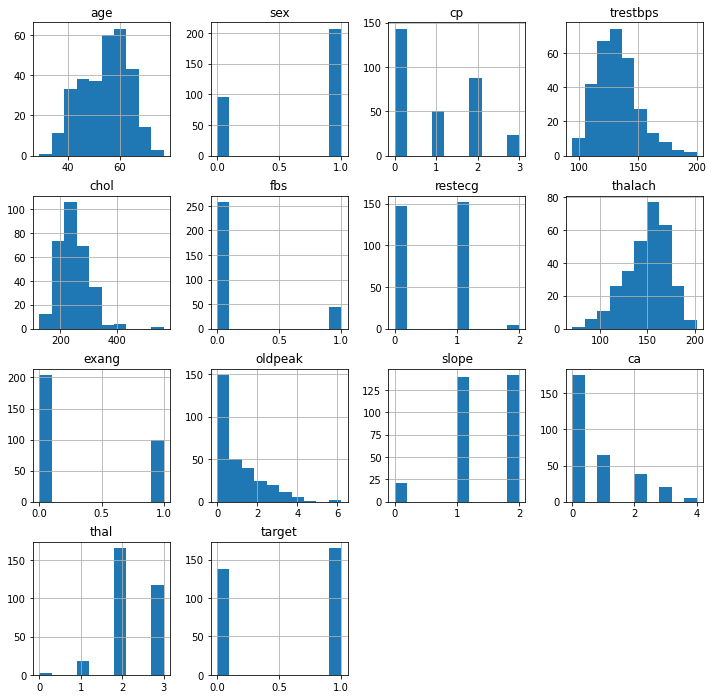

In [13]:
# plotting histograms for each entity
data.hist(figsize = (12, 12))
plt.show()

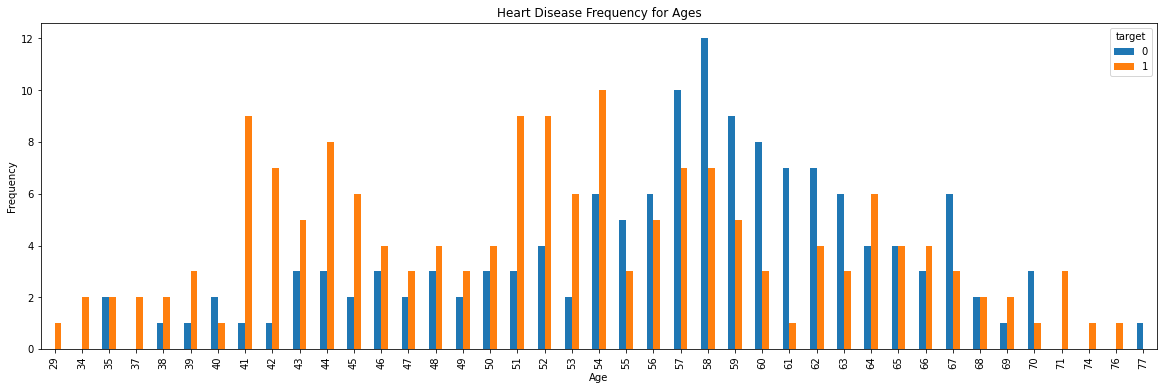

In [14]:
pd.crosstab(data.age,data.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

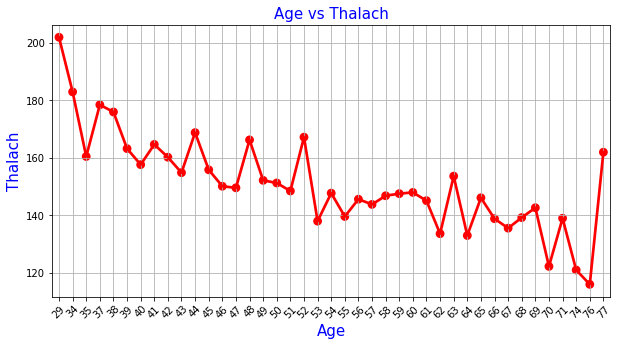

In [15]:
# Plotting the relation between Thalch and Age
uni_age=sorted(data.age.unique())
age_thalach_values=data.groupby('age')['thalach'].count().values
mean_thalach=[]
for i,age in enumerate(uni_age):
    mean_thalach.append(sum(data[data['age']==age].thalach)/age_thalach_values[i])
    
plt.figure(figsize=(10,5))
sns.pointplot(x=uni_age,y=mean_thalach,color='red',alpha=0.8)
plt.xlabel('Age',fontsize = 15,color='blue')
plt.xticks(rotation=45)
plt.ylabel('Thalach',fontsize = 15,color='blue')
plt.title('Age vs Thalach',fontsize = 15,color='blue')
plt.grid()
plt.show()

In [16]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [17]:
X = data.drop('target', axis=1)
y = data['target']

In [18]:
# Splitting the dataset 
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, stratify=y)

In [19]:
# convert the data to categorical labels
from tensorflow.keras.utils import to_categorical

Y_train = to_categorical(y_train, num_classes=None)
Y_test = to_categorical(y_test, num_classes=None)
print (Y_train.shape)
print (Y_train[:10])

(227, 2)
[[0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]]


In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers

# define a function to build the keras model
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(16, input_dim=13, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(8, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(2, activation='softmax'))
    
    # compile model
    adam = Adam(lr=0.001)
    model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model

model = create_model()

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                224       
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 136       
_________________________________________________________________
dropout_1 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 18        
Total params: 378
Trainable params: 378
Non-trainable params: 0
_________________________________________________________________
None


In [21]:
# fit the model
history=model.fit(X_train, Y_train, validation_data=(X_test, Y_test),epochs=110, batch_size=80)

Epoch 1/110
3/3 [==============================] - 0s 111ms/step - loss: 0.7059 - accuracy: 0.5771 - val_loss: 0.6848 - val_accuracy: 0.5526
Epoch 2/110
3/3 [==============================] - 0s 40ms/step - loss: 0.7090 - accuracy: 0.5110 - val_loss: 0.6697 - val_accuracy: 0.6974
Epoch 3/110
3/3 [==============================] - 0s 32ms/step - loss: 0.7027 - accuracy: 0.5110 - val_loss: 0.6759 - val_accuracy: 0.6711
Epoch 4/110
3/3 [==============================] - 0s 24ms/step - loss: 0.7180 - accuracy: 0.5022 - val_loss: 0.6864 - val_accuracy: 0.5526
Epoch 5/110
3/3 [==============================] - 0s 24ms/step - loss: 0.6975 - accuracy: 0.5507 - val_loss: 0.6804 - val_accuracy: 0.6974
Epoch 6/110
3/3 [==============================] - 0s 23ms/step - loss: 0.6938 - accuracy: 0.5903 - val_loss: 0.6791 - val_accuracy: 0.6842
Epoch 7/110
3/3 [==============================] - 0s 28ms/step - loss: 0.6953 - accuracy: 0.5463 - val_loss: 0.6799 - val_accuracy: 0.6842
Epoch 8/110
3/3 [==

3/3 [==============================] - 0s 22ms/step - loss: 0.5793 - accuracy: 0.6960 - val_loss: 0.5523 - val_accuracy: 0.7368
Epoch 60/110
3/3 [==============================] - 0s 24ms/step - loss: 0.5877 - accuracy: 0.6784 - val_loss: 0.5765 - val_accuracy: 0.6974
Epoch 61/110
3/3 [==============================] - 0s 21ms/step - loss: 0.6031 - accuracy: 0.6520 - val_loss: 0.5554 - val_accuracy: 0.7368
Epoch 62/110
3/3 [==============================] - 0s 28ms/step - loss: 0.6099 - accuracy: 0.6784 - val_loss: 0.5507 - val_accuracy: 0.7368
Epoch 63/110
3/3 [==============================] - 0s 24ms/step - loss: 0.6354 - accuracy: 0.6388 - val_loss: 0.5531 - val_accuracy: 0.7368
Epoch 64/110
3/3 [==============================] - 0s 18ms/step - loss: 0.6047 - accuracy: 0.6960 - val_loss: 0.5519 - val_accuracy: 0.7368
Epoch 65/110
3/3 [==============================] - 0s 27ms/step - loss: 0.5944 - accuracy: 0.6608 - val_loss: 0.5442 - val_accuracy: 0.7632
Epoch 66/110
3/3 [========

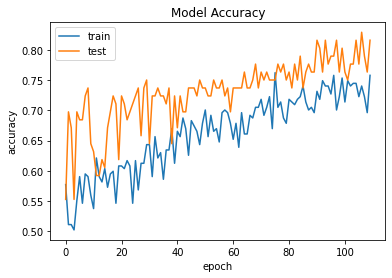

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
# Model accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

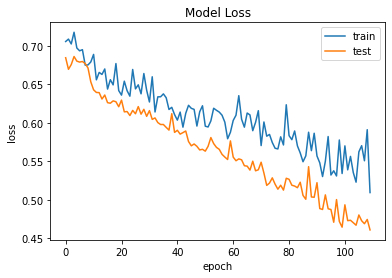

In [23]:
# Model Losss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

## Now Implementing Using XGBoost

In [24]:
# Importing required Libraries
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, StratifiedKFold

In [25]:

xg_params = {
    'eta': [0.01, 0.025, 0.05, 0.075, 0.25, 0.3, 0.5],
    'max_depth': [3, 5, 6, 7, 9],
    'tree_method': ['auto']
}

In [26]:
clf_XGB = XGBClassifier(n_estimators = 100, objective= 'binary:logistic', seed=555)
grid2 = GridSearchCV(clf_XGB, xg_params, scoring="roc_auc", cv=5, verbose=10, n_jobs=-1)
grid2.fit(X_train, y_train)

Fitting 5 folds for each of 35 candidates, totalling 175 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1964s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 114 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 140 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done 175 out of 175 | elapsed:    7.6s finished


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, seed=555,
                                     subsample=None, tree_me

In [27]:
results = sklearn.model_selection.cross_val_score(grid2.best_estimator_, X_train,y_train, cv=5)
print ("Accuracy - Train CV: ", results.mean())

tr = grid2.best_estimator_.predict(X_train), y_train.tolist()
te = grid2.best_estimator_.predict(X_test), y_test.tolist()
# print(te)

print ("Accuracy - Train : ", sklearn.metrics.accuracy_score(grid2.best_estimator_.predict(X_train), y_train))
print ("Accuracy - Test : ", sklearn.metrics.accuracy_score(grid2.best_estimator_.predict(X_test), y_test))

Accuracy - Train CV:  0.8321739130434782
Accuracy - Train :  0.9118942731277533
Accuracy - Test :  0.881578947368421


In [65]:
Neural_train = np.mean(history.history['accuracy'])*100
Neural_test = np.mean(history.history['val_accuracy'])*100
XG_train = sklearn.metrics.accuracy_score(grid2.best_estimator_.predict(X_train), y_train)*100
XG_test = sklearn.metrics.accuracy_score(grid2.best_estimator_.predict(X_test), y_test)*100
acc_list = [Neural_train, Neural_test, XG_train, XG_test]
acc_names = ['Neural_train', 'Neural_test', 'XG_train', 'XG_test']
acc_pos = [i for i, _ in enumerate(acc_names)]

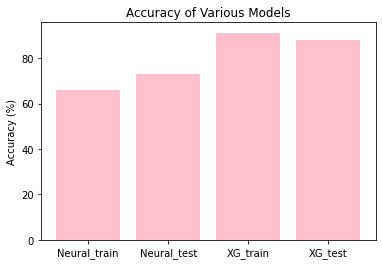

In [76]:

plt.bar(acc_pos, acc_list, color='pink')
# plt.xlabel("Type")
plt.ylabel("Accuracy (%)")
plt.title("Accuracy of Various Models")

plt.xticks(acc_pos, acc_names)

# plt.legend(['Neural_train', 'Neural_test', 'XG_train', 'XG_test'])
plt.show()

In [79]:
# Thalch is the main column responsible for heart disease

In [80]:
# This way I have create an model which can predcit heart disease by an Acuuracy of 88% for unknown data.
# With much less cpu time using XGBoost

In [81]:
# From this comparison we can infer that XGBoost gives more accuracy than the Noraml Neuarl Network Model
# With much less CPU/GPU time